In [1]:
import json
import pandas as pd
from collections import Counter

from matplotlib import pyplot as plt

### We're starting with loading the data and seeing some basic dimensions and structure

In [2]:
# Loads the data and preprocesses a bit

with open("../../data/seeds.gamma2.json") as fd:
    seeds = json.load(fd)
    
counter = Counter()
    
for seed in seeds:
    seed["disciplines_count"] = len(set(seed["disciplines"]))
    seed["educational_level_count"] = len(set(seed["educational_levels"]))
    seed["lom_educational_level_count"] = len(set(seed["lom_educational_levels"]))
    counter.update(seed["keywords"])

df = pd.DataFrame(data=seeds)

In [3]:
print(seeds[0])

{'external_id': 'surf:oai:surfsharekit.nl:5aed5ce4-40b5-439c-b341-2be24f002517', 'url': 'https://www.youtube.com/watch?v=ynociNTXoPU&list=PL-J9RGSpAwsTUz3q-4-Iv-v4i4FBO8Avf&index=41', 'title': 'Geneesmiddel van de week - Fytomenadion ', 'language': 'nl', 'keywords': ['Video', 'geneesmiddel', 'Exemplarische geneesmiddelenlijst'], 'description': 'Video over de werking, het gebruik en de dosering van Fytomenadion ', 'mime_type': None, 'copyright': 'cc-by-nc-nd-40', 'author': [], 'publisher_date': None, 'lom_educational_levels': ['WO'], 'educational_levels': ['bbbd99c6-cf49-4980-baed-12388f8dcff4', '2998f2e0-449d-4911-86a2-f4cbf1a20b56'], 'humanized_educational_levels': ['WO', 'WO - Master'], 'disciplines': [], 'humanized_disciplines': [], 'collection': 'sharekit', 'disciplines_count': 0, 'educational_level_count': 2, 'lom_educational_level_count': 1}


In [4]:
print(len(seeds))

8681


In [5]:
df.shape

(8681, 20)

### Now we're going to display for a few filters how the values of those filters are distributed in the set.

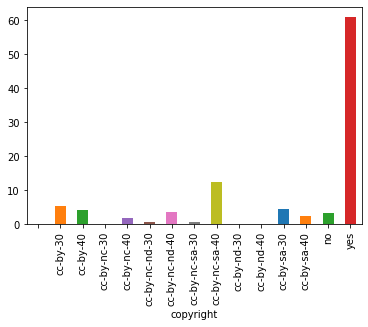

In [6]:
cc_counts = df.groupby("copyright").size()
cc_counts = cc_counts / len(seeds) * 100
cc_counts.plot.bar()

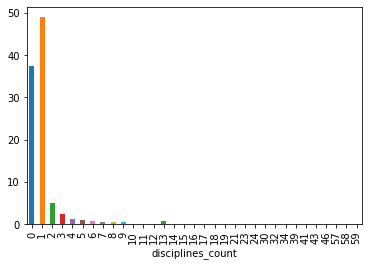

In [7]:
discipline_counts = df.groupby("disciplines_count").size()
discipline_counts = discipline_counts / len(seeds) * 100
discipline_counts.plot.bar()

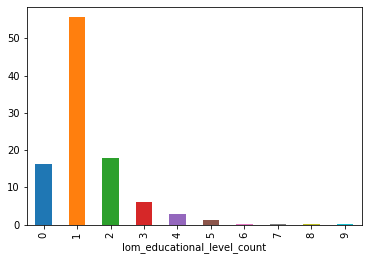

In [8]:
basic_edu_level_counts = df.groupby("lom_educational_level_count").size()
basic_edu_level_counts = basic_edu_level_counts / len(seeds) * 100
basic_edu_level_counts.plot.bar()

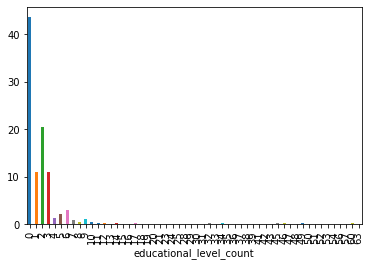

In [9]:
human_edu_level_counts = df.groupby("educational_level_count").size()
human_edu_level_counts = human_edu_level_counts / len(seeds) * 100
human_edu_level_counts.plot.bar()

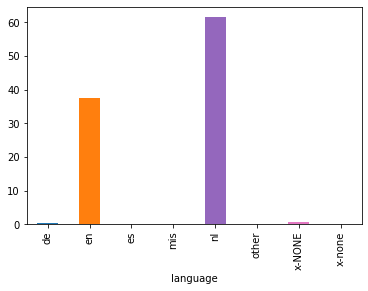

In [10]:
language_counts = df.groupby("language").size()
language_counts = language_counts / len(seeds) * 100
language_counts.plot.bar()

### A simple wordcloud like table that shows which words occur how often in the keywords

In [11]:
counter.most_common()

[('#hbovpk', 412),
 ('dier', 407),
 ('Brede professionele basis', 369),
 ('Video', 351),
 ('nain', 340),
 ('Vakdidactisch bekwaam', 239),
 ('MOOC', 203),
 ('vee', 193),
 ('plant', 169),
 ('lesmaterialen', 151),
 ('biobased economy', 146),
 ('Pedagogisch bekwaam', 145),
 ('NAIN', 141),
 ('professionalisering', 137),
 ('Vakinhoudelijk bekwaam', 128),
 ('zorgverlener', 103),
 ('BEOK', 102),
 ('Natuurbeheer', 96),
 ('klinisch redeneren', 92),
 ('dww', 87),
 ('SurfOER-pilot', 86),
 ('rekenen', 82),
 ('DIER', 81),
 ('taal', 80),
 ('didactiek', 78),
 ('Dierenwelzijn', 78),
 ('Exemplarische geneesmiddelenlijst', 77),
 ('Geneesmiddel', 77),
 ('paard', 76),
 ('Melkveehouderij', 75),
 ('nederland', 74),
 ('agrarisch onderwijs', 68),
 ('differentiatie', 67),
 ('bio-energie', 66),
 ('Paarden', 65),
 ('school en omgeving', 65),
 ('Practicum clip', 64),
 ('VEE', 64),
 ('VOEDING', 62),
 ('#avans', 62),
 ('Stedelijk gebied', 61),
 ('leerproces', 60),
 ('Instruction clip', 59),
 ('Nutrition', 59),
 ('do

### Here we're going to check how many materials are in "themes"

In [12]:
# This definition gets borrowed from the portal
DISCIPLINE_ENTRIES = [
    dict(id='2adcec22-095d-4937-aed7-48788080460b', theme='Aarde en milieu',
         name='Aardwetenschappen'),
    dict(id='e683a77c-f926-4c00-8e9e-e609cb93fc85',
         theme='Onderwijs en Opvoeding', name='Andragologie'),
    dict(id='455d527a-bfd0-4460-919e-12e0478a54cf',
         theme='Taal en Communicatie', name='Arabische taal en cultuur'),
    dict(id='8e080031-93e9-4c07-b4dc-73d5d096a2fe',
         theme='Exact en informatica', name='Astronomie'),
    dict(id='92161d11-91ce-48e2-b79a-8aa2df8b7022',
         theme='Economie en Bedrijf', name='Bedrijfskunde'),
    dict(id='cba3253b-ca4b-4bd5-bbf5-2cc90d910e57', theme='Recht en Bestuur',
         name='Bestuurskunde'),
    dict(id='2b363227-8633-4652-ad57-c61f1efc02c8', theme='Aarde en milieu',
         name='Biologie'),
    dict(id='652bc6a3-d024-493f-9199-a08340cbb2b3', theme='Techniek',
         name='Bouwkunde'),
    dict(id='1f7aa29f-38d8-4dab-91db-3be52669951f',
         theme='Taal en Communicatie', name='Chinese taal en cultuur'),
    dict(id='94a7654d-c145-4b9c-aab3-7dc478534437', theme='Techniek',
         name='Civiele techniek'),
    dict(id='3629ac98-42b8-47db-acb2-e37327042857',
         theme='Taal en Communicatie', name='Communicatiewetenschap'),
    dict(id='4df72ecd-3928-4abb-b227-8abd451e4195',
         theme='Gedrag en Maatschappij', name='Culturele antropologie'),
    dict(id='24850a94-16c6-4b87-8dce-a8b9a6673e5d', theme='Aarde en milieu',
         name='population studies'),
    dict(id='3b12504f-5600-42b7-aaf3-2b9fd011c093', theme='Gezondheid',
         name='Diergeneeskunde'),
    dict(id='7f772375-6e8e-43fe-9b08-d7f3971d8cc9',
         theme='Taal en Communicatie',
         name='Documentaire informatievoorziening'),
    dict(id='81a1f605-db58-448d-a1dc-da682316c505',
         theme='Taal en Communicatie', name='Duitse taal en cultuur'),
    dict(id='4ba5583f-b147-42cc-a083-ce5ebfd53746',
         theme='Economie en Bedrijf', name='Economie'),
    dict(id='8cfb914a-ead0-4125-b389-d5d9816afb95', theme='Techniek',
         name='Elektrotechniek'),
    dict(id='18f53978-1118-4051-a778-b8d7f60ca982',
         theme='Taal en Communicatie', name='Engelse taal en cultuur'),
    dict(id='d35b903f-1598-4bdd-a2fa-8aba854df762', theme='Kunst en Cultuur',
         name='Filosofie'),
    dict(id='9f4710e3-f173-404e-b12e-577657a5da04',
         theme='Taal en Communicatie', name='Franse taal en cultuur'),
    dict(id='5c98610c-3f7d-4521-b231-d0932b4ca799', theme='Gezondheid',
         name='Geneeskunde'),
    dict(id='c001f86a-4f8f-4420-bd78-381c615ecedc', theme='Aarde en milieu',
         name='Geografie'),
    dict(id='ef3a0b2e-0843-4e0a-b45b-788be6e1ec8d', theme='Kunst en Cultuur',
         name='Geschiedenis'),
    dict(id='596e13b2-5626-4312-8440-50e9bd7b4271',
         theme='Taal en Communicatie',
         name='Griekse en Latijnse taal en cultuur'),
    dict(id='3ddfe1f4-c8d8-44c7-92d0-8c3c5d6e51f5',
         theme='Onderwijs en Opvoeding', name='Huishoudkunde'),
    dict(id='2845473d-ce18-450a-9135-6738abbdc129',
         theme='Exact en informatica', name='Informatica'),
    dict(id='aedcfc1c-a676-4f40-8587-4a5f43a354b5',
         theme='Taal en Communicatie', name='Italiaanse taal en cultuur'),
    dict(id='8e3e2aab-1e36-4942-b86a-eba155353b23', theme='Kunst en Cultuur',
         name='Kunstgeschiedenis'),
    dict(id='db5b20c4-4e94-4554-8137-a45acb130ad2', theme='Aarde en milieu',
         name='Landbouw'),
    dict(id='315566f5-ca2c-4fb2-bf82-263ec13c9b75', theme='Techniek',
         name='Materiaalkunde'),
    dict(id='20f264c8-a132-4b43-96dd-c661fd6bace7', theme='Aarde en milieu',
         name='Milieuwetenschappen'),
    dict(id='7aa6f577-b02d-484a-90d6-72fc80199f9a', theme='Kunst en Cultuur',
         name='Muziekwetenschap'),
    dict(id='e98be5ad-4bd2-4768-a9eb-7e24026e360c',
         theme='Exact en informatica', name='Natuurkunde'),
    dict(id='3401cf6e-82e4-404c-b216-b980ff407159',
         theme='Taal en Communicatie', name='Nederlandse taal en cultuur'),
    dict(id='0861c43d-1874-4788-b522-df8be575677f',
         theme='Onderwijs en Opvoeding', name='Onderwijskunde'),
    dict(id='03d65ce0-2fd7-4f16-91f1-dcdce873dffc', theme='Recht en Bestuur',
         name='Organisatiekunde'),
    dict(id='86390768-492e-4d9e-8bfe-65648e79522a',
         theme='Onderwijs en Opvoeding', name='Pedagogiek'),
    dict(id='b922af97-b3a5-48ac-a01d-32ad5cab5abc', theme='Recht en Bestuur',
         name='Politicologie'),
    dict(id='dabf3753-248a-495b-b861-bcd36e2b55cb',
         theme='Taal en Communicatie', name='Portugese taal en cultuur'),
    dict(id='c6c55e80-9fae-440b-b50a-4a1f70432734', theme='Techniek',
         name='Engineering'),
    dict(id='10169c87-c77a-4ab7-8c19-c79ba7865bbf',
         theme='Gedrag en Maatschappij', name='Psychologie'),
    dict(id='4449624e-dfcc-4414-958a-d770a168f637', theme='Recht en Bestuur',
         name='Recht'),
    dict(id='116fbfd6-77d8-4676-8634-8cfd686942c9',
         theme='Taal en Communicatie', name='Russische studies'),
    dict(id='3aab168a-9b24-4aca-b0f1-4bfb12e7c288',
         theme='Exact en informatica', name='Scheikunde'),
    dict(id='6cfbea61-4877-4518-9b06-9f07146e139d', theme='Aarde en milieu',
         name='Sociale geografie'),
    dict(id='e5346879-4051-4ad9-bef8-2078620ef6cf',
         theme='Gedrag en Maatschappij', name='Sociale wetenschappen'),
    dict(id='49b28e01-e836-408b-9cf2-2976f85312c7',
         theme='Gedrag en Maatschappij', name='Sociologie'),
    dict(id='952bf604-cc38-44e3-889a-a9e74a18da8e',
         theme='Taal en Communicatie', name='Spaanse taal en cultuur'),
    dict(id='b3f61346-92c4-4fb5-9207-6a4142b64122',
         theme='Taal en Communicatie', name='Taal- en literatuurwetenschap'),
    dict(id='b9a2c9ea-48f6-4218-b974-c14e84b00c1a', theme='Kunst en Cultuur',
         name='Theaterwetenschap'),
    dict(id='e605402f-4cc2-46bb-9026-d1d49bde17bf', theme='Kunst en Cultuur',
         name='Theologie'),
    dict(id='e6ca634f-c1aa-4d03-9e26-4725a31887f1', theme='Techniek',
         name='Verkeerskunde'),
    dict(id='9ca10565-ec88-44b7-abc2-582dfdea5abc', theme='Techniek',
         name='Vervoer en logistiek'),
    dict(id='4c8a3378-6616-459d-acc4-83ee5a9b91a2', theme='Kunst en Cultuur',
         name='Vormgeving'),
    dict(id='08018424-b218-4de6-b174-df6982e7a72d',
         theme='Economie en Bedrijf', name='Vrijetijdsmanagement'),
    dict(id='693f235a-511f-4f59-9633-6b1abd0e3b6f', theme='Techniek',
         name='Werktuigbouwkunde'),
    dict(id='7afbb7a6-c29b-425c-9c59-6f79c845f5f0',
         theme='Exact en informatica', name='Wiskunde'),
    dict(id='db5b20c4-4e94-4554-8137-a45acb130ad2', theme='Techniek',
         name='Agrotechnologie')
]

DISCIPLINE_CUSTOM_THEME = dict()

for d in DISCIPLINE_ENTRIES:
    discipline_id, theme = d["id"], d["theme"]
    DISCIPLINE_CUSTOM_THEME.setdefault(discipline_id, []).append(theme)

for seed in seeds:
    themes = []
    for discipline_id in seed["disciplines"]:
        themes += DISCIPLINE_CUSTOM_THEME.get(discipline_id, [])
    seed["themes"] = themes
    seed["themes_count"] = len(set(themes))

df = pd.DataFrame(data=seeds)    

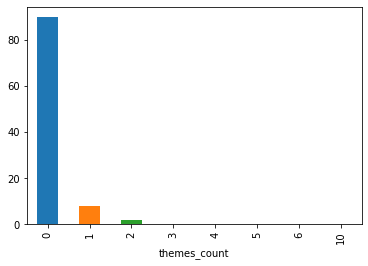

In [13]:
themes_counts = df.groupby("themes_count").size()
themes_counts = themes_counts / len(seeds) * 100
themes_counts.plot.bar()

### We're going to look deeper into the education levels

In [14]:
for seed in [seed for seed in seeds if len(set(seed["humanized_educational_levels"])) >= 60]:
    print(seed)
    print()
    print()

{'external_id': 'wikiwijsmaken:36404', 'url': 'http://maken.wikiwijs.nl/36404/Rekenapps?p=imscp', 'title': 'Rekenapps', 'language': 'nl', 'keywords': ['blog', 'ipad', 'rekenapps', 'rekenen', 'tablet'], 'description': 'Waardevolle rekenapps in het reken/wiskunde-onderwijs', 'mime_type': 'application/x-Wikiwijs-Arrangement', 'copyright': 'cc-by-30', 'author': ['BEGIN:VCARD\nVERSION:3.0\nPRODID:-//Sabre//Sabre VObject 3.3.5//EN\nFN: den Engelsen\nN:Engelsen;;den;;\nEND:VCARD'], 'publisher_date': '2012-03-13T12:10:50+01:00', 'lom_educational_levels': ['HBO', 'SO', 'WO', 'SBaO', 'BVE', 'VO', 'PO'], 'educational_levels': ['e51e6137-05d4-45ca-aed0-6e91551257d4', 'ad9872e5-edc4-4a62-9ee7-ba7daceba2e0', 'a598e56e-d1a6-4907-9e2c-3da64e59f9ae', 'e05b5eb1-6a65-4f45-9556-79b25cd91da8', '17da6976-2f1b-4214-a471-168f469d7e04', 'e72dacdd-968b-40ac-ad2c-8bd14c24e89f', 'c7942bb1-bf4f-409f-bc98-9a0b02f175dc', 'eaa0c07f-193e-4be5-8dc6-a00bbfc7a446', 'f33b30ee-3c82-4ead-bc20-4255be9ece2d', '6219cc2d-2545-4

In [15]:
EDUCATION_LEVELS = [
    'MBO, Niveau 2: Basisberoepsopleiding', 
    'VMBO gemengde leerweg, 2', 
    'VMBO kaderberoepsgerichte leerweg, 1', 
    'VWO 2', 
    'WO - Bachelor', 
    'Groep 3', 
    'WO - Master', 
    'VMBO kaderberoepsgerichte leerweg, 2', 
    'VMBO basisberoepsgerichte leerweg, 4', 
    'VMBO gemengde leerweg, 3', 
    'VMBO basisberoepsgerichte leerweg, 1', 
    'VMBO theoretische leerweg, 1', 
    'Groep 4', 
    'Volwasseneneducatie, Niveau 1', 
    'MBO, Niveau 3: Vakopleiding', 
    'Volwasseneneducatie, Niveau 4', 
    'HAVO 4', 
    'HAVO 1', 
    'Groep 1', 
    'VMBO theoretische leerweg, 4', 
    'VWO 6', 
    'VMBO gemengde leerweg, 1', 
    'MBO, Niveau 4: Middenkaderopleiding', 
    'VMBO theoretische leerweg, 2', 
    'Groep 8', 
    'VMBO basisberoepsgerichte leerweg, 2', 
    'Groep 7', 
    'MBO', 
    'MBO, Niveau 1: Assistentenopleiding', 
    'Groep 6', 
    'VWO 1', 
    'HAVO 3', 
    'VWO 3', 
    'WO', 
    'Groep 5', 
    'Primair onderwijs', 
    'Groep 2', 
    'HAVO 5', 
    'Praktijkonderwijs', 
    'Volwasseneneducatie, Niveau 3', 
    'HBO - Master', 
    'Speciaal basisonderwijs', 
    'Beroepsonderwijs en Volwasseneneducatie', 
    'Volwasseneneducatie', 
    'Volwasseneneducatie, Niveau 2', 
    'VWO 4', 
    'VMBO theoretische leerweg, 3', 
    'VMBO basisberoepsgerichte leerweg, 3', 
    'VMBO kaderberoepsgerichte leerweg, 4', 
    'Speciaal onderwijs', 
    'HAVO', 
    'HAVO 2', 
    'VMBO gemengde leerweg, 4', 
    'VWO', 
    'VWO 5', 
    'HBO', 
    'HBO - Bachelor', 
    'Voortgezet onderwijs', 
    'VMBO', 
    'VMBO kaderberoepsgerichte leerweg, 3'
]

In [16]:
# Strategy is to look out for "main" education levels or: our education levels of interest.
# We'll assume the highest level. If we find a level other than our main level we've hit the lowest possible level
# We'll downgrade levels if we find a main level lower than the current level.

MAIN_EDUCATION_LEVELS = {
    "Volwasseneneducatie": 1,
    "Praktijkonderwijs": 1,
    "Beroepsonderwijs en Volwasseneneducatie": 1,
    "Middenkaderopleiding": 1,
    "MBO": 1,
    "HBO": 2,
    "WO": 3
}


for seed in seeds:
    current_level = 3 if len(seed["lom_educational_levels"]) else -1
    for education_level in seed["lom_educational_levels"]:
        for main_level, level in MAIN_EDUCATION_LEVELS.items():
            if not education_level.startswith(main_level):
                continue
            # The seed's education level matches a main level.
            # We re-assign current level and stop processing this education level,
            # as it shouldn't match multiple main education levels
            current_level = min(current_level, level)
            break
        else:
            # No main level found inside current education level. 
            # Dealing with an "other" means a lower education level than we're interested in.
            # So this seed has the lowest possible level. We're done processing this seed.
            current_level = 0
            break
    seed["lom_educational_level_numeric"] = current_level

    
for seed in seeds:
    current_level = 3 if len(seed["humanized_educational_levels"]) else -1
    for education_level in seed["humanized_educational_levels"]:
        for main_level, level in MAIN_EDUCATION_LEVELS.items():
            if not education_level.startswith(main_level):
                continue
            # The seed's education level matches a main level.
            # We re-assign current level and stop processing this education level,
            # as it shouldn't match multiple main education levels
            current_level = min(current_level, level)
            break
        else:
            # No main level found inside current education level. 
            # Dealing with an "other" means a lower education level than we're interested in.
            # So this seed has the lowest possible level. We're done processing this seed.
            current_level = 0
            break
    seed["educational_level_numeric"] = current_level


df = pd.DataFrame(data=seeds)    

2696

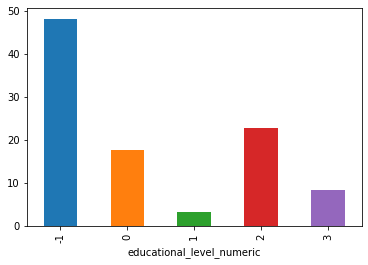

In [17]:
level_counts = df.groupby("educational_level_numeric").size()
he_level_counts = level_counts[2] + level_counts[3]
level_counts = level_counts / len(seeds) * 100
level_counts.plot.bar()
he_level_counts

2900

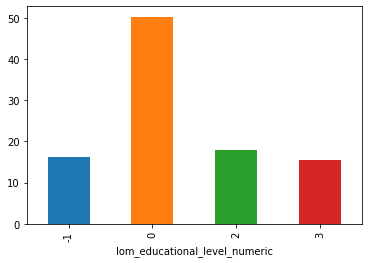

In [18]:
lom_level_counts = df.groupby("lom_educational_level_numeric").size()
he_lom_level_counts = lom_level_counts[2] + lom_level_counts[3]
lom_level_counts = lom_level_counts / len(seeds) * 100
lom_level_counts.plot.bar()
he_lom_level_counts

In [19]:
# Get a feel for amount of materials in absolute sense
df.groupby("educational_level_numeric").size()

educational_level_numeric
-1    4179
 0    1526
 1     280
 2    1976
 3     720
dtype: int64

### Re-run some dimension checks to see how the materials are distributed in the set for HE material.

In [20]:
higher_education_seeds = [seed for seed in seeds if seed["lom_educational_level_numeric"] > 0]
higher_education_df = pd.DataFrame(data=higher_education_seeds)

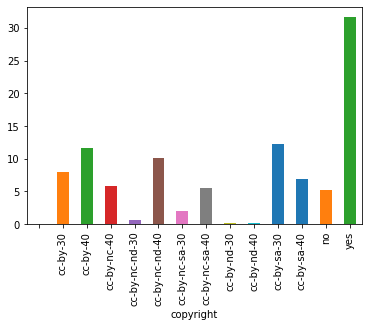

In [21]:
cc_counts = higher_education_df.groupby("copyright").size()
cc_counts = cc_counts / len(higher_education_seeds) * 100
cc_counts.plot.bar()

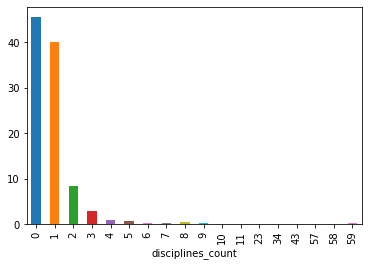

In [22]:
discipline_counts = higher_education_df.groupby("disciplines_count").size()
discipline_counts = discipline_counts / len(higher_education_seeds) * 100
discipline_counts.plot.bar()

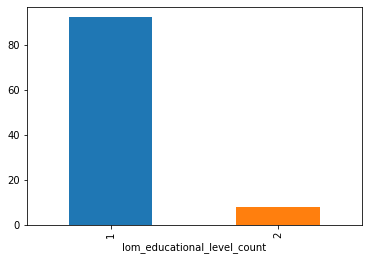

In [23]:
basic_edu_level_counts = higher_education_df.groupby("lom_educational_level_count").size()
basic_edu_level_counts = basic_edu_level_counts / len(higher_education_seeds) * 100
basic_edu_level_counts.plot.bar()

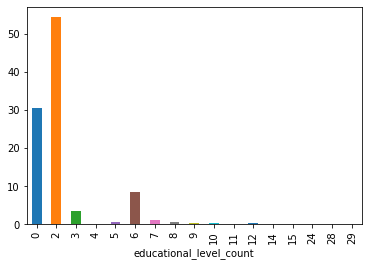

In [24]:
taxon_edu_level_counts = higher_education_df.groupby("educational_level_count").size()
taxon_edu_level_counts = taxon_edu_level_counts / len(higher_education_seeds) * 100
taxon_edu_level_counts.plot.bar()

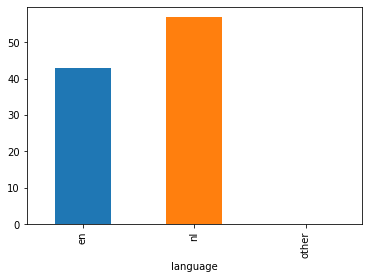

In [25]:
language_counts = higher_education_df.groupby("language").size()
language_counts = language_counts / len(higher_education_seeds) * 100
language_counts.plot.bar()

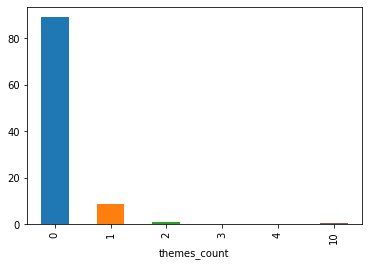

In [26]:
themes_counts = higher_education_df.groupby("themes_count").size()
themes_counts = themes_counts / len(higher_education_seeds) * 100
themes_counts.plot.bar()

### Now we're going to check how the "yes" copyright is distributed across repositories

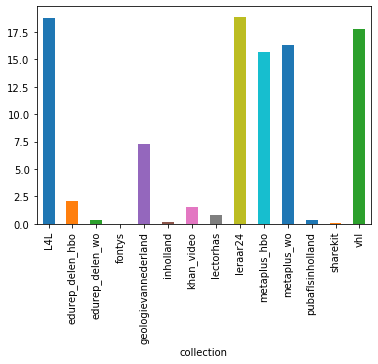

In [27]:
yes_seeds = [seed for seed in seeds if seed["copyright"] == "yes"]
yes_frame = pd.DataFrame(yes_seeds)

repo_counts = yes_frame.groupby("collection").size()
repo_counts = repo_counts / len(yes_seeds) * 100
repo_counts.plot.bar()

### And we're checking how the missing disciplines distribute across collections

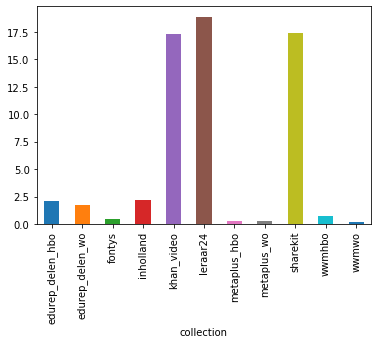

In [28]:
no_disciplines_seeds = [seed for seed in seeds if seed["disciplines_count"] == 0]
no_disciplines_frame = pd.DataFrame(no_disciplines_seeds)

no_disciplines_counts = no_disciplines_frame.groupby("collection").size()
no_disciplines_counts = no_disciplines_counts / len(yes_seeds) * 100
no_disciplines_counts.plot.bar()